Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("city_day.csv")

Preprocessing

In [3]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [9]:
date_column = 'Date'
aqi_column = 'AQI'
pollutant_columns = ['PM2.5', 'PM10', 'CO','SO2','O3']

In [32]:
data['City'].unique()

array(['Amaravati', 'Amritsar', 'Chandigarh', 'Delhi', 'Gurugram',
       'Hyderabad', 'Kolkata', 'Patna', 'Visakhapatnam'], dtype=object)

Visualization

In [25]:
delhi_data=data[(data['City'] == 'Delhi')]
delhi_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


 Create line plots or time series plots to visualize the overall AQI trend over time.

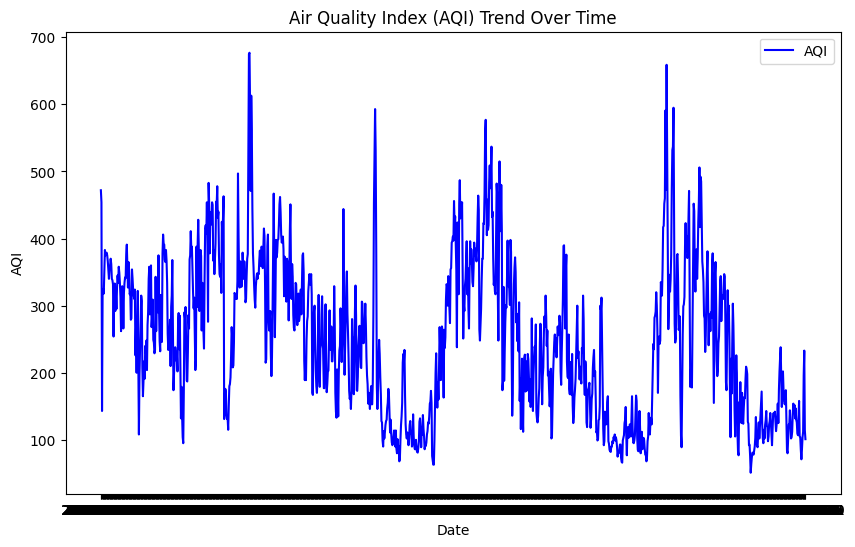

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(delhi_data['Date'], delhi_data['AQI'], label='AQI', color='blue')
plt.title('Air Quality Index (AQI) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time

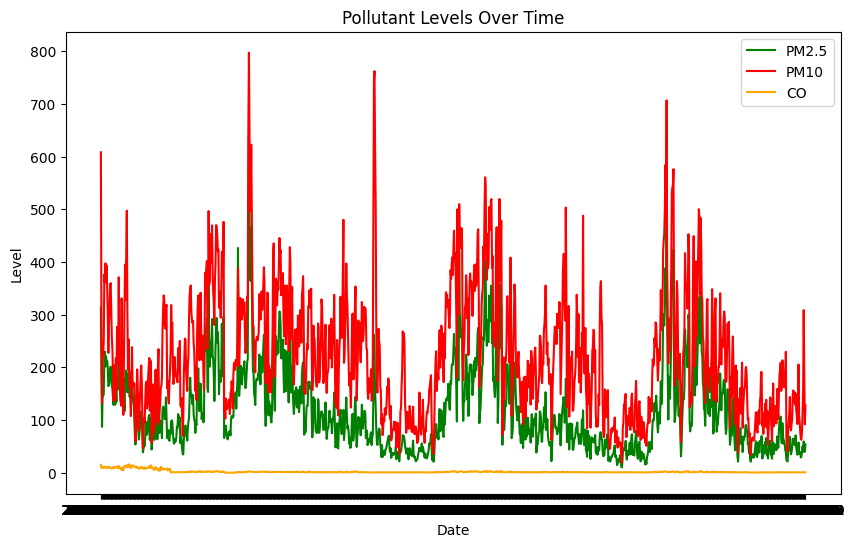

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(delhi_data['Date'], delhi_data['PM2.5'], label='PM2.5', color='green')
plt.plot(delhi_data['Date'], delhi_data['PM10'], label='PM10', color='red')
plt.plot(delhi_data['Date'], delhi_data['CO'], label='CO', color='orange')
plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Level')
plt.legend()
plt.show()

Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods

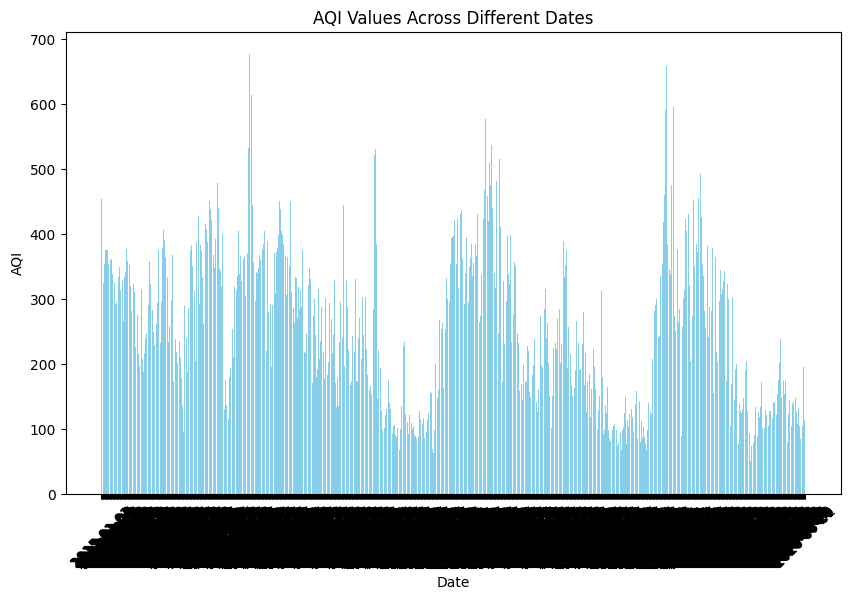

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(delhi_data['Date'], delhi_data['AQI'], color='skyblue')
plt.title('AQI Values Across Different Dates')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories

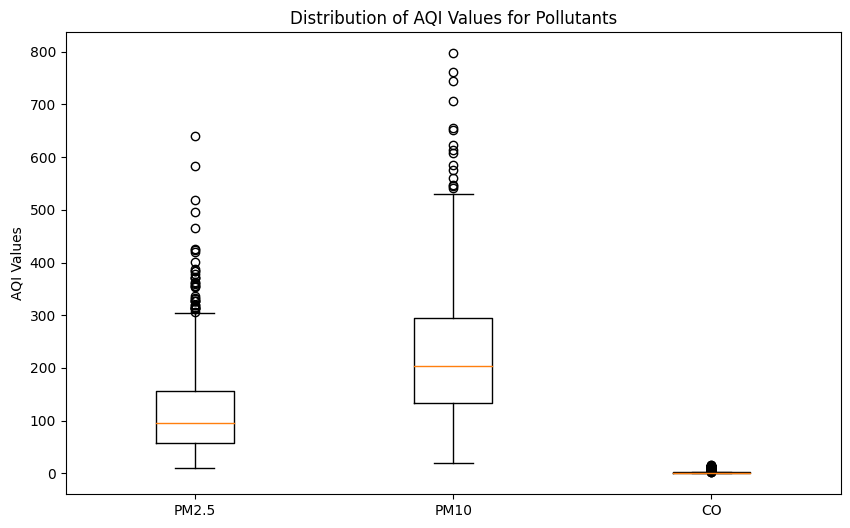

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot([delhi_data['PM2.5'], delhi_data['PM10'], delhi_data['CO']], labels=['PM2.5', 'PM10', 'CO'])
plt.title('Distribution of AQI Values for Pollutants')
plt.ylabel('AQI Values')
plt.show()

Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.


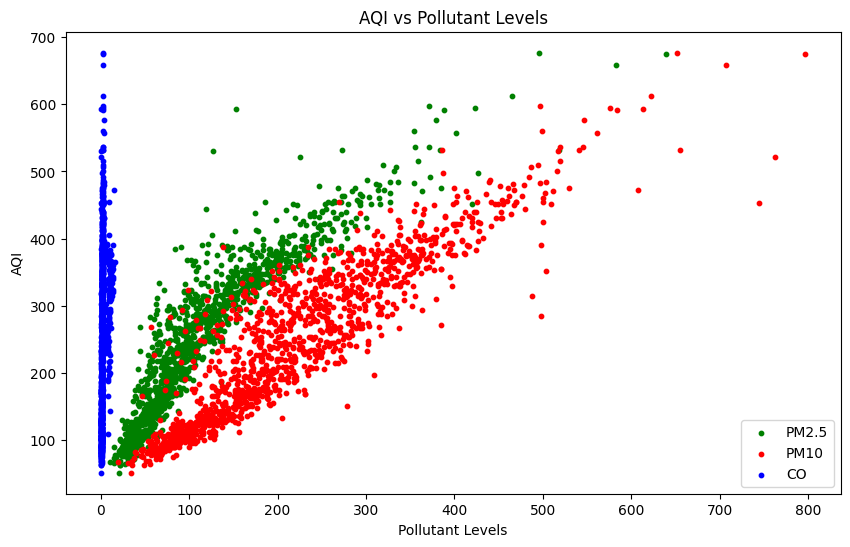

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(delhi_data['PM2.5'], delhi_data['AQI'], s=10, color='green', label='PM2.5')
plt.scatter(delhi_data['PM10'], delhi_data['AQI'], s=10, color='red', label='PM10')
plt.scatter(delhi_data['CO'], delhi_data['AQI'], s=10, color='blue', label='CO')
plt.title('AQI vs Pollutant Levels')
plt.xlabel('Pollutant Levels')
plt.ylabel('AQI')
plt.legend()
plt.show()